# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time
import gzip
import random
import math
from tqdm import tqdm

%matplotlib inline

## Input data

In [17]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


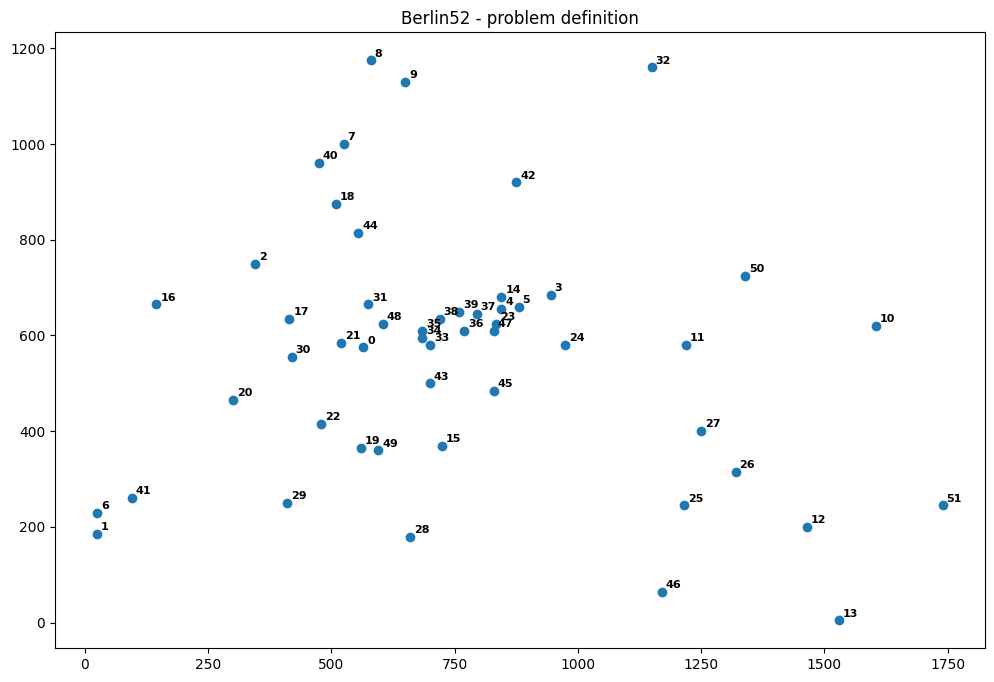

In [18]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 1200x800 with 0 Axes>

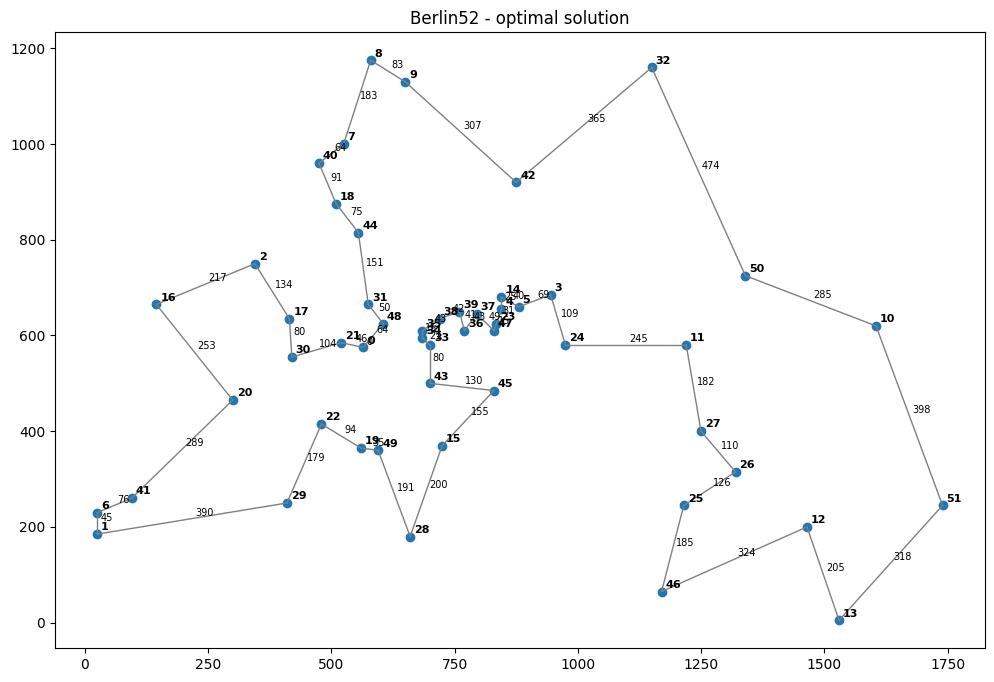

In [19]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [20]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [21]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [22]:
t0 = time.time()

T = 1000000
def random_sampling(T):
    permutations = np.empty((T, n), dtype=np.int64)
    costs = np.zeros(T)
    for i in range(T):
        permutations[i, :] = np.random.permutation(n)
        costs[i] = tsp_objective_function(permutations[i, :])
    
    print(time.time() - t0)
    
    p = permutations[costs.argmin(), :]
    print(tsp_objective_function(p), p)
    return costs, tsp_objective_function(p)

costs_random, best_val = random_sampling(T)

14.278602361679077
20597.04051804858 [ 6 22 45  3 33 15 17 18  7 36 37 21 38 11 27 50  8 49  1 44 32 31 43 28
  0 48  9 42 24  5 46 26 25  4 39 40  2 16 47 14 35 13 51 10 12 34 19 41
 29 20 30 23]


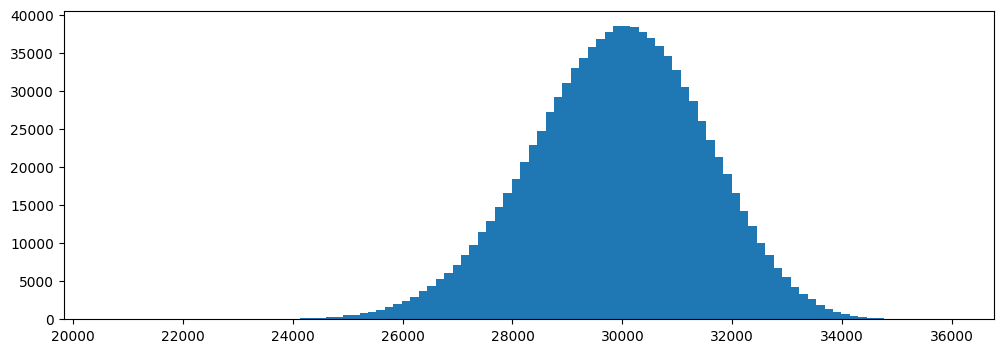

29911.21497420345 1579.1980783431025


In [23]:
plt.figure(figsize=(12,4))
plt.hist(costs_random, bins=100)
plt.show()

print(costs_random.mean(), costs_random.std())

## Simulated Annealing

In [24]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [25]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()
def simmulated_annealing(T,radius,alpha):
    p = np.random.permutation(n)
    p_cost = tsp_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = tsp_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
    
    print(time.time() - t0, costs.min())
    return costs


sa_costs=simmulated_annealing(T,radius,alpha)

11.191296100616455 8642.402397635758


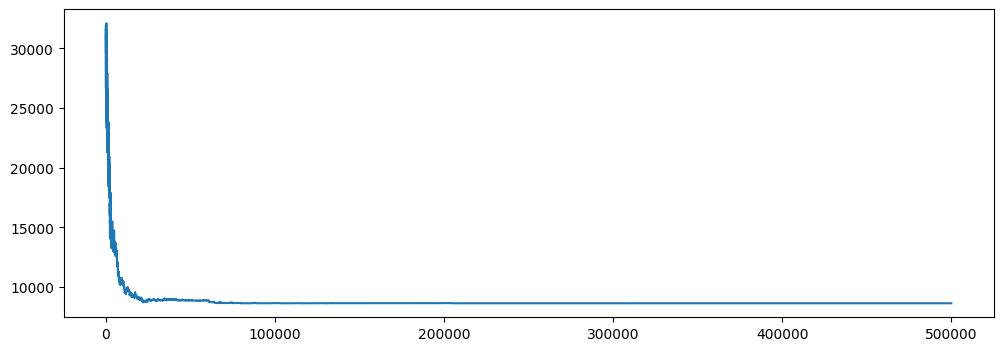

In [26]:
plt.figure(figsize=(12,4))
plt.plot(sa_costs)
plt.show()

## SGA-PMX

In [27]:
def PMX(parent1, parent2):
    size = len(parent1)
    offspring1, offspring2 = np.array(parent1), np.array(parent2)
    start, end = np.sort(np.random.choice(range(size), 2, replace=False))
    offspring1[start:end+1], offspring2[start:end+1] = parent2[start:end+1].copy(), parent1[start:end+1].copy()
    
    mapping1 = {parent2[i]: parent1[i] for i in range(start, end + 1)}
    mapping2 = {parent1[i]: parent2[i] for i in range(start, end + 1)}
    
    def apply_mapping(offspring, mapping, start, end):
        for i in list(range(0, start)) + list(range(end + 1, size)):
            original = offspring[i]
            while original in mapping:
                original = mapping[original]
            offspring[i] = original

    apply_mapping(offspring1, mapping1, start, end)
    apply_mapping(offspring2, mapping2, start, end)
    
    return offspring1, offspring2


parent1 = np.array([8, 4, 7, 3, 6, 2, 5, 1, 9, 0])
parent2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
offspring1, offspring2 = PMX(parent1, parent2)

print("Parent 1:", parent1)
print("Parent 2:", parent2)
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)
offspring1.sort()
offspring2.sort()
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)


Parent 1: [8 4 7 3 6 2 5 1 9 0]
Parent 2: [0 1 2 3 4 5 6 7 8 9]
Offspring 1: [0 1 2 3 4 5 6 7 8 9]
Offspring 2: [8 4 7 3 6 2 5 1 9 0]
Offspring 1: [0 1 2 3 4 5 6 7 8 9]
Offspring 2: [0 1 2 3 4 5 6 7 8 9]


In [28]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [29]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

time0 = time.time()

def sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, mutation_function, crossover, printing=True):
    costs=[]
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)
    
    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])
    
    for t in range(number_of_iterations):
    
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)
    
        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]
    
        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation_function(children_population[i, :])
    
        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])
    
        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])
    
        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]
    
        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        costs.append(objective_values.min())
        if(printing):
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return objective_values.min(), costs

sga_result, sga_costs=sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, reverse_sequence_mutation, PMX)

  0     0.02783465 24345.06648226 28596.33587957 29965.32768613 1070.29660602
  1     0.04539967 23824.88973894 27411.43548426 28619.68132009 958.50932647
  2     0.06514382 22491.07244768 26490.20041310 27607.30262369 876.89118733
  3     0.08174634 22491.07244768 25798.26131833 26738.32529696 765.57022083
  4     0.09841728 22298.04421830 25125.77874071 26089.12692475 825.18855558
  5     0.11443782 21137.67876696 24481.59122864 25489.15612704 826.74960398
  6     0.13011503 21001.89687033 23918.51884286 24877.95594910 816.60064452
  7     0.14547157 20700.96454594 23320.13350199 24333.24101117 770.75181990
  8     0.16105032 19774.99179310 22842.09492478 23732.64422339 661.23730317
  9     0.17647886 19774.99179310 22373.55294964 23146.14739076 634.46767046
 10     0.19371200 18959.88885391 21966.16630732 22727.63924753 616.53135741
 11     0.21096826 18107.07499332 21551.15739897 22321.23172171 623.09225968
 12     0.22732377 18107.07499332 21154.39196145 21904.50707735 662.4232347

In [30]:
random_results, sa_results, sga_results = [],[],[]
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

for i in range(10):
    random_results.append(random_sampling(1000000)[1])
    sa_results.append(simmulated_annealing(500000,1,1)[-1])
    sga_results.append(sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, reverse_sequence_mutation, PMX, False)[0])


28.998823642730713
20997.93367789656 [ 3 42  4 50  9  5 40 30  0 43 37  2 36 19 28 26 27 32 38 34 48 46 49 20
  1  6 17 44  8 14 23 45 24 51 10 12 13 11 25 39 22 41 33 18 29  7 21 35
 16 15 31 47]
39.711533069610596 8679.819615223783
56.40703248977661
21272.035578955958 [18 21 22 36 15 48  3 47 29 41  6  0  4 25 39  9  8 34 43  2 17 49 30 42
 14  1 16 46 35 50 12 24 19 20 44 37  5 28 27 13 51 26 10 11 38 31 23 33
 45 40  7 32]
67.2088463306427 8812.160846131976
84.41570591926575
21220.360228104128 [27 49 22 13 51 12 10 15 41  1 34 33 35 44  3 11 50 26 36 17  4 42 25 20
 40 43 47 16 45 24 32  5 14 28  6  2 18  7  8 30  0 23 37 38 19 48 21 31
  9 39 29 46]
95.99155116081238 8363.425578229577
112.9942398071289
21370.36364004224 [22  7 26 50 51 14  9 21 30  1 41 20  0 17  8 37 18 44 23  5 31  2 48 29
  6 15 16 39 45 38 28 33 19 35 34  4 43 46 25 24 10 27 11 32 36 12 13 47
 40 42  3 49]
124.08003902435303 9400.978013589965
140.84115052223206
21852.167447685515 [18 23 35 37 15 38 47 33 44  3

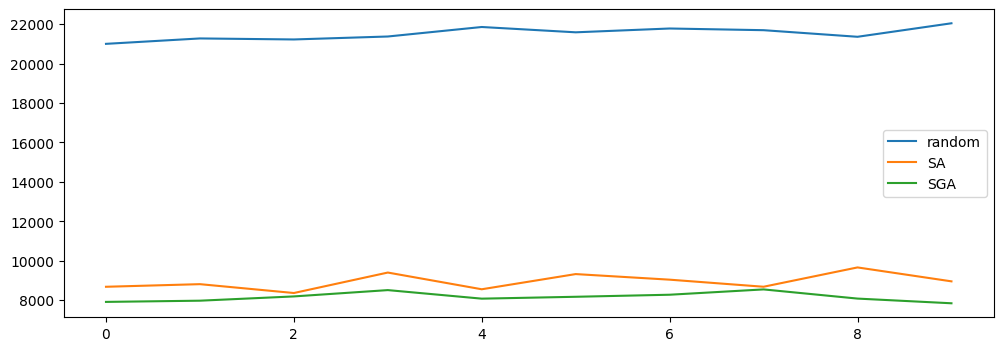

In [31]:
plt.figure(figsize=(12,4))
plt.plot(random_results, label="random")
plt.plot(sa_results, label="SA")
plt.plot(sga_results, label="SGA")
plt.legend()
plt.show()

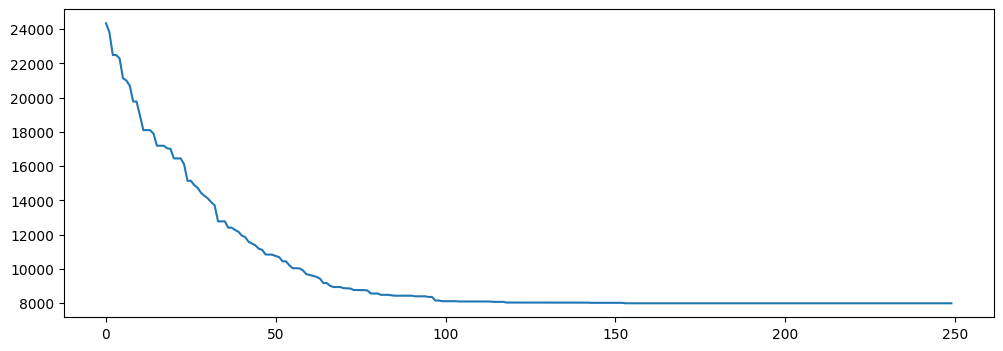

In [32]:
plt.figure(figsize=(12,4))
plt.plot(sga_costs)
plt.show()

In [33]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

time0 = time.time()

def swap_random_elements(permutation):
    i, j = random.sample(range(len(permutation)), 2)
    permutation[i], permutation[j] = permutation[j], permutation[i]

    return permutation


sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, swap_random_elements, PMX)

  0     0.02403307 23599.97803135 28539.59148278 29794.27506802 1029.81735710
  1     0.03913093 23599.97803135 27400.61065249 28574.42775096 942.50437542
  2     0.05360079 23323.36088228 26503.82749581 27601.02328099 831.10334384
  3     0.06835151 23119.32550948 25800.10661456 26756.16229576 714.67203087
  4     0.08309793 22043.33910421 25179.13973924 26110.26877324 744.26609526
  5     0.09779930 21258.41832333 24567.62124722 25481.28930208 779.67339614
  6     0.11303043 21258.41832333 23973.40950052 24940.02691703 775.45909156
  7     0.12799001 20305.86473869 23396.94301895 24327.49865927 738.27182477
  8     0.14283681 19408.14400468 22879.91346091 23768.17121302 710.45057405
  9     0.15762520 19408.14400468 22356.05470379 23254.91920593 736.19678057
 10     0.17224431 18999.21383100 21878.97596109 22733.13668194 697.07556393
 11     0.18697667 18999.21383100 21379.21129387 22255.42809161 693.18046738
 12     0.20163846 18494.43028455 20812.05713350 21727.21897974 703.7356739

(9945.155061348218,
 [23599.97803134725,
  23599.97803134725,
  23323.3608822829,
  23119.32550948464,
  22043.339104211896,
  21258.418323325735,
  21258.418323325735,
  20305.864738690805,
  19408.144004684844,
  19408.144004684844,
  18999.213830995745,
  18999.213830995745,
  18494.430284552487,
  17993.030604742744,
  17993.030604742744,
  17685.496829970187,
  17499.177655378655,
  17038.692866877078,
  16687.914110888407,
  16626.06674550785,
  16022.660925831098,
  15823.77352607128,
  15143.718485221953,
  15143.718485221953,
  15030.4403426008,
  14325.994373252504,
  14325.994373252504,
  14325.994373252504,
  13849.90104614188,
  13835.81802501209,
  13466.22740356692,
  13422.263543832285,
  13365.30348162095,
  13343.679460333582,
  13276.816733645037,
  12978.849359719465,
  12978.849359719465,
  12909.61581165176,
  12800.101245655807,
  12775.397740402761,
  12730.867697588103,
  12666.27640687407,
  12607.663342929622,
  12529.082820934664,
  12448.788331806316,
  123

In [37]:
sga_t_results = []
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

for i in range(10):
    sga_t_results.append(sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, swap_random_elements, PMX, False)[0])
   

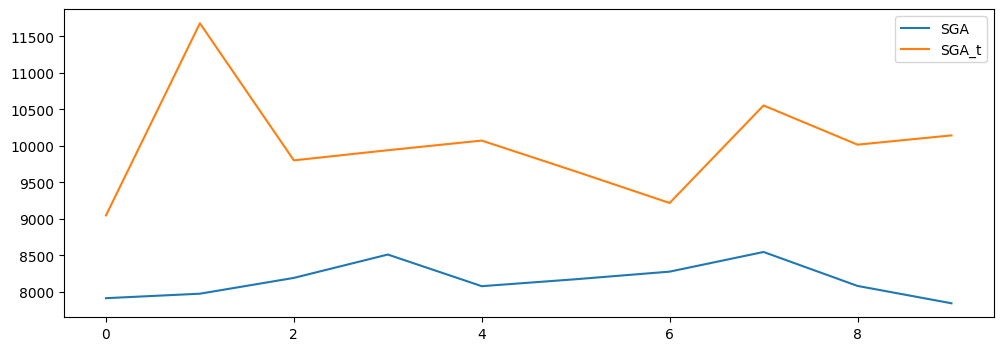

In [38]:
plt.figure(figsize=(12,4))
plt.plot(sga_results, label="SGA")
plt.plot(sga_t_results, label="SGA_t")
plt.legend()
plt.show()

http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/

In [150]:
def load_tsp(filename):
    with gzip.open(filename, 'rt') as f:
        lines = f.readlines()
    
    edge_weights = []
    dimension = 0
    is_weight_section = False
    

    for line in lines:
        if line.startswith("DIMENSION:"):
            dimension = int(line.split(":")[1].strip())
        elif line.startswith("EDGE_WEIGHT_SECTION"):
            is_weight_section = True
            continue 
        elif line.startswith("EOF") or line.startswith("DISPLAY_DATA_SECTION"):
            break
        elif is_weight_section:
            weights = list(map(int, line.split()))
            edge_weights.extend(weights)
    
    distance_matrix = np.zeros((dimension, dimension), dtype=int)
    
    index = 0
    for i in range(dimension):
        for j in range(i + 1, dimension):
            distance_matrix[i][j] = edge_weights[index]
            distance_matrix[j][i] = edge_weights[index]
            index += 1

    return distance_matrix, dimension


In [151]:
def load_full_matrix_tsp(filename):
    with gzip.open(filename, 'rt') as f:
        lines = f.readlines()
    
    dimension = None
    matrix_data = []
    coordinates = []
    
    in_edge_weight_section = False
    in_display_data_section = False
    
    for line in lines:
        line = line.strip()
        
        if line.startswith("DIMENSION"):
            dimension = int(line.split(":")[1].strip())
        elif line.startswith("EDGE_WEIGHT_SECTION"):
            in_edge_weight_section = True
            in_display_data_section = False
        elif line.startswith("DISPLAY_DATA_SECTION"):
            in_display_data_section = True
            in_edge_weight_section = False
        elif line == "EOF":
            break
        elif in_edge_weight_section:
            row = list(map(int, line.split()))
            matrix_data.extend(row)
        elif in_display_data_section:
            parts = line.split()
            if len(parts) == 3:
                city_id = int(parts[0]) - 1
                x, y = map(float, parts[1:])
                coordinates.append((city_id, x, y))
    
    if dimension and matrix_data:
        distance_matrix = np.array(matrix_data).reshape((dimension, dimension))
    else:
        raise ValueError("Dimension or matrix data missing in TSP file.")
    
    return distance_matrix, dimension



In [152]:
def load_tour(filename):
    with gzip.open(filename, 'rt') as f:
        lines = f.readlines()
    
    tour = []
    is_tour_section = False
    
    for line in lines:
        if line.startswith("TOUR_SECTION"):
            is_tour_section = True
            continue
        elif line.startswith("-1") or line.startswith("EOF"):
            break
        elif is_tour_section:
            city_index = int(line.strip())
            tour.append(city_index)
    
    return tour

In [153]:
def euclidean_distance(coord1, coord2):
    return round(math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2))

def load_euc_2d_tsp(filename):
    coordinates = []
    in_node_coord_section = False
    
    with gzip.open(filename, 'rt') as f: 
        for line in f:
            line = line.strip()
    
            if line.startswith("NODE_COORD_SECTION"):
                in_node_coord_section = True
                continue
            elif line == "EOF":
                break
            
            if in_node_coord_section:
                parts = line.split()
                if len(parts) == 3:
                    city_id = int(parts[0]) - 1
                    x, y = map(float, parts[1:])
                    coordinates.append((x, y))
    
    n = len(coordinates)
    distance_matrix = np.zeros((n, n), dtype=int)
    
    for i in range(n):
        for j in range(i + 1, n):
            distance = euclidean_distance(coordinates[i], coordinates[j])
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance 
    
    return distance_matrix, n


In [154]:
A, n = load_tsp('bayg29.tsp.gz')
print("Problem size:")
print(n)
print("Distance Matrix:")
print(A)

Problem size:
29
Distance Matrix:
[[  0  97 205 139  86  60 220  65 111 115 227  95  82 225 168 103 266 205
  149 120  58 257 152  52 180 136  82  34 145]
 [ 97   0 129 103  71 105 258 154 112  65 204 150  87 176 137 142 204 148
  148  49  41 211 226 116 197  89 153 124  74]
 [205 129   0 219 125 175 386 269 134 184 313 201 215 267 248 271 274 236
  272 160 151 300 350 239 322  78 276 220  60]
 [139 103 219   0 167 182 180 162 208  39 102 227  60  86  34  96 129  69
   58  60 120 119 192 114 110 192 136 173 173]
 [ 86  71 125 167   0  51 296 150  42 131 268  88 131 245 201 175 275 218
  202 119  50 281 238 131 244  51 166  95  69]
 [ 60 105 175 182  51   0 279 114  56 150 278  46 133 266 214 162 302 242
  203 146  67 300 205 111 238  98 139  52 120]
 [220 258 386 180 296 279   0 178 328 206 147 308 172 203 165 121 251 216
  122 231 249 209 111 169  72 338 144 237 331]
 [ 65 154 269 162 150 114 178   0 169 151 227 133 104 242 182  84 290 230
  146 165 121 270  91  48 158 200  39  64 210

In [155]:
p = load_tour('bayg29.opt.tour.gz')
p = [city - 1 for city in p]
print("Optimal Solution:")
print(tsp_objective_function(p), p)

Optimal Solution:
1610.0 [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]


In [156]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
sga_result, sga_costs=sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, reverse_sequence_mutation, PMX)

  0    41.04876614 3598.00000000 4415.91600000 4694.00000000 205.00686072
  1    41.06387353 3467.00000000 4212.20200000 4447.00000000 191.21297340
  2    41.07716870 3311.00000000 4027.32800000 4240.00000000 179.08911864
  3    41.09025741 3045.00000000 3881.83400000 4081.00000000 167.91755847
  4    41.10338163 3045.00000000 3761.99800000 3955.00000000 154.81249948
  5    41.11699319 3018.00000000 3653.54800000 3840.00000000 148.47291907
  6    41.13084221 2982.00000000 3553.01400000 3737.00000000 147.68058032
  7    41.14473391 2665.00000000 3469.76800000 3639.00000000 143.22869187
  8    41.16129565 2665.00000000 3396.29200000 3564.00000000 139.40079891
  9    41.17557693 2665.00000000 3318.48800000 3485.00000000 141.37778417
 10    41.19021702 2588.00000000 3231.01600000 3399.00000000 138.24635888
 11    41.20587206 2567.00000000 3142.18000000 3313.00000000 141.41607971
 12    41.22735262 2550.00000000 3048.96400000 3224.00000000 145.42410634
 13    41.24167705 2409.00000000 2942.

In [157]:
A, n = load_full_matrix_tsp('bays29.tsp.gz')
print("Problem size:")
print(n)
print("Distance Matrix:")
print(A)

Problem size:
29
Distance Matrix:
[[  0 107 241 190 124  80 316  76 152 157 283 133 113 297 228 129 348 276
  188 150  65 341 184  67 221 169 108  45 167]
 [107   0 148 137  88 127 336 183 134  95 254 180 101 234 175 176 265 199
  182  67  42 278 271 146 251 105 191 139  79]
 [241 148   0 374 171 259 509 317 217 232 491 312 280 391 412 349 422 356
  355 204 182 435 417 292 424 116 337 273  77]
 [190 137 374   0 202 234 222 192 248  42 117 287  79 107  38 121 152  86
   68  70 137 151 239 135 137 242 165 228 205]
 [124  88 171 202   0  61 392 202  46 160 319 112 163 322 240 232 314 287
  238 155  65 366 300 175 307  57 220 121  97]
 [ 80 127 259 234  61   0 386 141  72 167 351  55 157 331 272 226 362 296
  232 164  85 375 249 147 301 118 188  60 185]
 [316 336 509 222 392 386   0 233 438 254 202 439 235 254 210 187 313 266
  154 282 321 298 168 249  95 437 190 314 435]
 [ 76 183 317 192 202 141 233   0 213 188 272 193 131 302 233  98 344 289
  177 216 141 346 108  57 190 245  43  81 243

In [158]:
p = load_tour('bays29.opt.tour.gz')
p = [city - 1 for city in p]
print("Optimal Solution:")
print(tsp_objective_function(p), p)

Optimal Solution:
2020.0 [0, 27, 5, 11, 8, 4, 25, 28, 2, 1, 19, 9, 3, 14, 17, 16, 13, 21, 10, 18, 24, 6, 22, 26, 7, 23, 15, 12, 20]


In [159]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
sga_result, sga_costs=sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, reverse_sequence_mutation, PMX)

  0    44.25957632 4432.00000000 5571.70200000 5917.00000000 275.99012518
  1    44.27681398 4333.00000000 5298.01400000 5598.00000000 247.44804264
  2    44.28976130 4048.00000000 5078.28200000 5354.00000000 228.74967645
  3    44.30286026 4047.00000000 4884.65600000 5160.00000000 226.35271075
  4    44.31563044 3955.00000000 4703.57000000 4967.00000000 216.19427629
  5    44.32851386 3791.00000000 4549.45800000 4814.00000000 208.26556181
  6    44.34383655 3463.00000000 4409.39000000 4663.00000000 194.88846528
  7    44.35795307 3447.00000000 4293.17400000 4522.00000000 191.90283928
  8    44.37212706 3419.00000000 4154.56800000 4395.00000000 214.21638914
  9    44.38640785 3285.00000000 4005.73000000 4273.00000000 221.09983514
 10    44.40334415 3087.00000000 3843.49200000 4121.00000000 221.18275235
 11    44.41822076 3087.00000000 3661.50600000 3929.00000000 192.18589429
 12    44.43731999 3007.00000000 3479.00000000 3692.00000000 142.71997758
 13    44.45374417 2962.00000000 3360.

In [160]:
filename = 'kroA100.tsp.gz'
A, n = load_euc_2d_tsp(filename)

print("Problem size:")
print(n)
print("Distance Matrix:\n", A)

Problem size:
100
Distance Matrix:
 [[   0 1693 2252 ...  783 1468 2643]
 [1693    0 1708 ... 1911 3156 1831]
 [2252 1708    0 ... 1786 3315  454]
 ...
 [ 783 1911 1786 ...    0 1535 2228]
 [1468 3156 3315 ... 1535    0 3760]
 [2643 1831  454 ... 2228 3760    0]]


In [161]:
p = load_tour('kroA100.opt.tour.gz')
p = [city - 1 for city in p]
print("Optimal Solution:")
print(tsp_objective_function(p), p)

Optimal Solution:
21282.0 [0, 46, 92, 27, 66, 57, 60, 50, 86, 24, 80, 68, 63, 39, 53, 1, 43, 49, 72, 67, 84, 81, 94, 12, 75, 32, 36, 4, 51, 77, 95, 38, 29, 47, 99, 40, 70, 13, 2, 42, 45, 28, 33, 82, 54, 6, 8, 56, 19, 11, 26, 85, 34, 61, 59, 76, 22, 97, 90, 44, 31, 10, 14, 16, 58, 73, 20, 71, 9, 83, 35, 98, 37, 23, 17, 78, 52, 87, 15, 93, 21, 69, 65, 25, 64, 3, 96, 55, 79, 30, 88, 41, 7, 91, 74, 18, 89, 48, 5, 62]


In [162]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 300
sga_result, sga_costs=sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, reverse_sequence_mutation, PMX)

  0    47.64499712 138974.00000000 163282.11400000 169579.00000000 4797.77663350
  1    47.67292905 138490.00000000 158455.17000000 163592.00000000 4247.25940544
  2    47.70048714 135912.00000000 154280.29000000 159453.00000000 4287.01492392
  3    47.72940111 135912.00000000 150894.04200000 155646.00000000 4084.02396225
  4    47.75701737 130745.00000000 147372.01600000 152418.00000000 4246.45206540
  5    47.78530908 130745.00000000 144338.58000000 149214.00000000 3758.02272207
  6    47.81395555 127262.00000000 141703.42400000 146261.00000000 3504.09718590
  7    47.84087849 126905.00000000 139106.96400000 143155.00000000 3317.91479015
  8    47.86928439 126905.00000000 136998.78000000 141068.00000000 3058.14565703
  9    47.89634943 126905.00000000 135558.77800000 138974.00000000 2657.96722341
 10    47.92467570 121567.00000000 134111.01000000 137427.00000000 2505.17476554
 11    47.95147157 119485.00000000 132442.96000000 135819.00000000 2534.84848510
 12    47.97779632 117532.00

Info about best solutions for kroA150 and kroA200 (and previous ones):

https://github.com/pdrozdowski/TSPLib.Net/blob/master/TSPLIB95/tsp/bestSolutions.txt


bayg29 : 1610

bays29 : 2020

kroA100 : 21282

kroA150 : 26524

kroA200 : 29368

In [163]:
filename = 'kroA150.tsp.gz'
A, n = load_euc_2d_tsp(filename)

print("Problem size:")
print(n)
print("Distance Matrix:\n", A)

Problem size:
150
Distance Matrix:
 [[   0 1693 2252 ...  533 1725 1382]
 [1693    0 1708 ... 1188 1629 1770]
 [2252 1708    0 ... 2078  596 1075]
 ...
 [ 533 1188 2078 ...    0 1645 1438]
 [1725 1629  596 ... 1645    0  481]
 [1382 1770 1075 ... 1438  481    0]]


In [164]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 1000
sga_result, sga_costs=sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, reverse_sequence_mutation, PMX)

  0    56.00614905 222539.00000000 248715.60200000 256338.00000000 5909.42215615
  1    56.04381633 218885.00000000 242328.40800000 249267.00000000 5380.15768371
  2    56.08125758 218885.00000000 237292.87200000 243355.00000000 4788.12201929
  3    56.11819506 212981.00000000 232809.82800000 238777.00000000 4827.37645667
  4    56.15833306 209985.00000000 228850.48200000 234236.00000000 4560.87634931
  5    56.19624496 199758.00000000 225275.71200000 230934.00000000 4746.24448770
  6    56.23475170 199758.00000000 221828.17200000 227396.00000000 4601.25118880
  7    56.27298570 199758.00000000 218568.89200000 223971.00000000 4525.24282137
  8    56.30984569 198278.00000000 215413.89400000 220947.00000000 4581.55488440
  9    56.34623194 198038.00000000 212371.17600000 217660.00000000 4337.11562597
 10    56.38507628 191828.00000000 209200.71800000 214566.00000000 4350.39580802
 11    56.42249656 191828.00000000 205711.45800000 211184.00000000 4061.80483089
 12    56.46066761 190924.00

In [165]:
filename = 'kroA200.tsp.gz'
A, n = load_euc_2d_tsp(filename)

print("Problem size:")
print(n)
print("Distance Matrix:\n", A)

Problem size:
200
Distance Matrix:
 [[   0 1700 1846 ...  452 1163 2616]
 [1700    0 1118 ... 1250 2651 1504]
 [1846 1118    0 ... 1536 2320 2615]
 ...
 [ 452 1250 1536 ...    0 1535 2228]
 [1163 2651 2320 ... 1535    0 3760]
 [2616 1504 2615 ... 2228 3760    0]]


In [166]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 1000
sga_result, sga_costs=sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, reverse_sequence_mutation, PMX)

  0    93.79396749 296206.00000000 329784.27600000 339370.00000000 7679.73087340
  1    93.84217548 296206.00000000 321373.22600000 329858.00000000 6617.49569059
  2    93.88881707 289241.00000000 314838.16200000 322325.00000000 5930.15626672
  3    93.93602395 282435.00000000 309652.71600000 316670.00000000 5555.52987062
  4    93.98321080 278939.00000000 305188.89400000 311786.00000000 5505.72048498
  5    94.03059030 274806.00000000 301133.31000000 307685.00000000 5693.19416724
  6    94.07816410 274760.00000000 296483.82600000 303114.00000000 5750.25852077
  7    94.12680674 273231.00000000 292413.90200000 299054.00000000 5627.20858725
  8    94.17608356 268076.00000000 288141.38200000 295023.00000000 5576.02561580
  9    94.22376847 268076.00000000 284586.44200000 291214.00000000 4915.48820918
 10    94.27150345 264243.00000000 281378.95200000 287061.00000000 4326.50807577
 11    94.31757784 263384.00000000 278498.37400000 283810.00000000 4124.28947215
 12    94.36332917 259425.00

# ZADANIE 2

In [173]:
#replace the fragments, and the rest cyclically starting from the end of the replaced fragment
def OX(parent1, parent2): 
    size = len(parent1)
    offspring1, offspring2 = np.array(parent1).copy(), np.array(parent2).copy()
    start, end = np.sort(np.random.choice(range(size), 2, replace=False))
    offspring1[start:end+1], offspring2[start:end+1] = parent2[start:end+1].copy(), parent1[start:end+1].copy()
    shifted1 = np.concatenate((parent1[end+1:],parent1[:end+1]))
    shifted1 = shifted1[~np.isin(shifted1,parent2[start:end+1])]
    shifted2 = np.concatenate((parent2[end+1:], parent2[:end+1]))
    shifted2=shifted2[~np.isin(shifted2,parent1[start:end+1])]

    n=len(shifted1)
    m=len(offspring1)

    for i in range(n):
        offspring1[(i+end+1)%m]=shifted1[i]
        offspring2[(i+end+1)%m]=shifted2[i]

    
    
    return offspring1, offspring2



parent1 = np.array([8, 4, 7, 3, 6, 2, 5, 1, 9, 0])
parent2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
offspring1, offspring2 = OX(parent1, parent2)

print("Parent 1:", parent1)
print("Parent 2:", parent2)
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)
offspring1.sort()
offspring2.sort()
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)


Parent 1: [8 4 7 3 6 2 5 1 9 0]
Parent 2: [0 1 2 3 4 5 6 7 8 9]
Offspring 1: [7 1 2 3 6 5 9 0 8 4]
Offspring 2: [2 4 7 3 5 6 8 9 0 1]
Offspring 1: [0 1 2 3 4 5 6 7 8 9]
Offspring 2: [0 1 2 3 4 5 6 7 8 9]


In [168]:
# find a cycle and keep it in both, switch elems
def CX(parent1, parent2):
    size = len(parent1)
    offspring1 = np.full(size, -1, dtype=int)
    offspring2 = np.full(size, -1, dtype=int)
    

    start = np.random.randint(size)
    index = start
    cycle_indices = []

    while True:
        cycle_indices.append(index)
        next_index = np.where(parent1 == parent2[index])[0][0]
        index = next_index
        if index == start:
            break

    cycle_indices = np.array(cycle_indices)

    offspring1[cycle_indices] = parent1[cycle_indices]
    offspring2[cycle_indices] = parent2[cycle_indices]
    
    remaining_indices = np.where(offspring1 == -1)[0]
    offspring1[remaining_indices] = parent2[remaining_indices]

    remaining_indices = np.where(offspring2 == -1)[0]
    offspring2[remaining_indices] = parent1[remaining_indices]

    return offspring1, offspring2

parent1 = np.array([8, 4, 7, 3, 6, 2, 5, 1, 9, 0])
parent2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
offspring1, offspring2 = CX(parent1, parent2)

print("Parent 1:", parent1)
print("Parent 2:", parent2)
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)
offspring1.sort()
offspring2.sort()
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)


Parent 1: [8 4 7 3 6 2 5 1 9 0]
Parent 2: [0 1 2 3 4 5 6 7 8 9]
Offspring 1: [0 4 7 3 6 2 5 1 8 9]
Offspring 2: [8 1 2 3 4 5 6 7 9 0]
Offspring 1: [0 1 2 3 4 5 6 7 8 9]
Offspring 2: [0 1 2 3 4 5 6 7 8 9]


In [169]:
def RSRX(parent1, parent2): #roll segments form parents and paste them at the beginning of every offspring
    size = len(parent1)
    offspring1 = np.full(size, -1, dtype=int)
    offspring2 = np.full(size, -1, dtype=int)

    start = np.random.randint(0, size)
    segment_length = np.random.randint(1, size // 2)
    end = (start + segment_length) % size

    if start < end:
        segment1 = parent1[start:end]
        segment2 = parent2[start:end]
    else:
        segment1 = np.concatenate((parent1[start:], parent1[:end]))
        segment2 = np.concatenate((parent2[start:], parent2[:end]))

    rotation = np.random.randint(1, size)
    segment1 = np.roll(segment1, rotation)
    segment2 = np.roll(segment2, rotation)

    offspring1[:len(segment1)] = segment1
    offspring2[:len(segment2)] = segment2

    def fill_remaining(offspring, parent):
        current_index = len(segment1)
        for city in parent:
            if city not in offspring:
                offspring[current_index] = city
                current_index += 1
                if current_index >= size:
                    break

    fill_remaining(offspring1, parent2)
    fill_remaining(offspring2, parent1)

    return offspring1, offspring2

parent1 = np.array([8, 4, 7, 3, 6, 2, 5, 1, 9, 0])
parent2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
offspring1, offspring2 = RSRX(parent1, parent2)

print("Rodzic 1:", parent1)
print("Rodzic 2:", parent2)
print("Potomek 1:", offspring1)
print("Potomek 2:", offspring2)
offspring1.sort()
offspring2.sort()
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)

Rodzic 1: [8 4 7 3 6 2 5 1 9 0]
Rodzic 2: [0 1 2 3 4 5 6 7 8 9]
Potomek 1: [4 7 8 0 1 2 3 5 6 9]
Potomek 2: [1 2 0 8 4 7 3 6 5 9]
Offspring 1: [0 1 2 3 4 5 6 7 8 9]
Offspring 2: [0 1 2 3 4 5 6 7 8 9]


In [170]:
def ERX(parent1, parent2): #choose neighbours based on their popularity
    size = len(parent1)

    edge_table = {i: set() for i in range(size)}
    
    for i in range(size):
        next1 = (i + 1) % size
        next2 = (i - 1) % size
        edge_table[parent1[i]].add(parent1[next1])
        edge_table[parent1[i]].add(parent1[next2])
        edge_table[parent2[i]].add(parent2[next1])
        edge_table[parent2[i]].add(parent2[next2])

    def create_offspring(start_city):
        offspring = []
        current_city = start_city
        remaining_cities = set(range(size))

        while len(offspring) < size:
            offspring.append(current_city)
            remaining_cities.discard(current_city) 

            if remaining_cities:
                candidates = [city for city in edge_table[current_city] if city in remaining_cities]
                if candidates:
                    current_city = max(candidates, key=lambda city: (len(edge_table[city]), np.random.random()))
                else:
                    current_city = remaining_cities.pop()
            else:
                break

        return np.array(offspring)


    offspring1 = create_offspring(parent1[0])
    offspring2 = create_offspring(parent2[0])

    return offspring1, offspring2


parent1 = np.array([8, 4, 7, 3, 6, 2, 5, 1, 9, 0])
parent2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

offspring1, offspring2 = ERX(parent1, parent2)

print("Parent 1:", parent1)
print("Parent 2:", parent2)
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)

Parent 1: [8 4 7 3 6 2 5 1 9 0]
Parent 2: [0 1 2 3 4 5 6 7 8 9]
Offspring 1: [8 4 5 2 3 7 6 0 1 9]
Offspring 2: [0 8 4 3 7 6 5 2 1 9]


In [171]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


In [174]:
results = [[] for _ in range(5)]
crossovers=[PMX, OX, CX, RSRX, ERX]
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

for i in tqdm(range(100)):
    for j,c in enumerate(crossovers):
        results[j].append(sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, reverse_sequence_mutation, c, False)[0])
    

100%|███████████████████████████████████████| 100/100 [1:06:01<00:00, 39.62s/it]


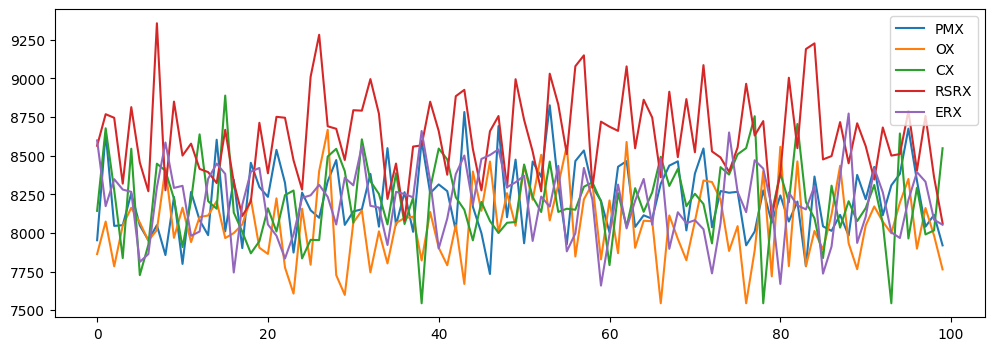

In [175]:
names=["PMX","OX", "CX", "RSRX", "ERX"]
plt.figure(figsize=(12,4))
for i in range(len(results)):
    plt.plot(results[i], label=names[i])
plt.legend()
plt.show()

In [176]:
results=[np.array(i) for i in results]
for res, name in zip(results, names):
    print(f"{name:<10} min: {np.min(res):.2f} mean: {np.mean(res):.2f}, var: {np.var(res):.2f}")


PMX        min: 7734.11 mean: 8216.13, var: 52430.03
OX         min: 7544.37 mean: 8058.53, var: 58344.14
CX         min: 7544.37 mean: 8205.55, var: 65202.54
RSRX       min: 8063.21 mean: 8623.85, var: 77646.98
ERX        min: 7658.96 mean: 8200.82, var: 52709.65


- OX najlepszy, chociaż wariancja nie jest najlepsza (jak wybierzemy zły fragment do zamiany to możemy bardzo zepsuć)
- Tylko CX i OX znalazły dokładne rozwiązanie
- RSRX jest najgorszy (jak można było się spodziewać)
- ERX czyli taktyka wybierania popularnych sąsiadów nie jest zła, mała wariancja


In [177]:
def insertion_mutation(p): #moving just one city
    q = p.copy()
    i, j = np.random.choice(len(p), 2, replace=False)
    city = q[i]
    q = np.delete(q, i)
    q = np.insert(q, j, city)
    return q

def scramble_mutation(p):  #randomly shuffles the cities within the selected segment
    q = p.copy()
    i, j = sorted(np.random.choice(len(p), 2, replace=False))
    segment = q[i:j+1]
    np.random.shuffle(segment)
    q[i:j+1] = segment
    return q

def shift_mutation(p, shift_size=3): #moving a selected segment to a new location in the list
    q = p.copy()
    i, j = sorted(np.random.choice(len(p), 2, replace=False))
    segment = q[i:j+1]
    q = np.delete(q, np.arange(i, j+1)) 
    shift_pos = np.random.randint(0, len(q) + 1)
    q = np.insert(q, shift_pos, segment)
    return q


def transposition_mutation(p, size=10): #swap two segments of size 10
    start1 = random.randint(0, len(p) - size)
    start2 = random.randint(0, len(p) - size)
    
    end1, end2 = start1 + size-1, start2 + size-1

    for i in range(size):
        p[start1 + i], p[start2 + i] = p[start2 + i], p[start1 + i]

    return p  


In [178]:
results_mutations = [[] for _ in range(5)]
mutations=[reverse_sequence_mutation, transposition_mutation, insertion_mutation, scramble_mutation, shift_mutation]
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

for i in tqdm(range(100)):
    for j,mutation in enumerate(mutations):
        results_mutations[j].append(sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, mutation, PMX, False)[0])
    

100%|█████████████████████████████████████████| 100/100 [31:54<00:00, 19.15s/it]


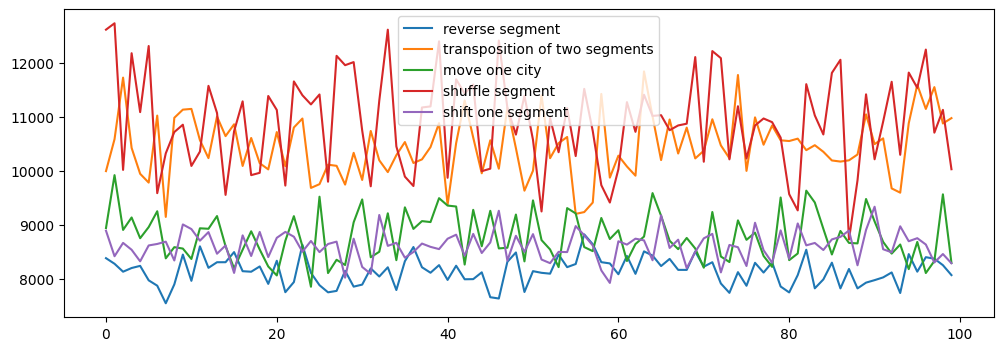

In [179]:
names=["reverse segment", "transposition of two segments", "move one city", "shuffle segment", "shift one segment"]
plt.figure(figsize=(12,4))
for i in range(len(results_mutations)):
    plt.plot(results_mutations[i], label=names[i])

plt.legend()
plt.show()